## Problem Description

It has been observed that in order to provide early intervention, doctors require a tool to estimate the likelihood that a patient would develop diabetes. Building a predictive model to gauge a patient's diabetes progression based on specific physiological and medical characteristics is the aim of this study.The aim variable, which is given as a continuous variable in the dataset, is the development of the disease one year after baseline.Physicians may use this to prioritise which patients need closer observation or longer-term care.

In [806]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

## Obtaining the Data and Data Description

In [807]:
data = datasets.load_diabetes(as_frame=True)
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [808]:
df = data['data']
df['target'] = data['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Summary of the statistics

In [809]:
summary_stats = df.describe()
print(summary_stats)

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

## Exploring the data

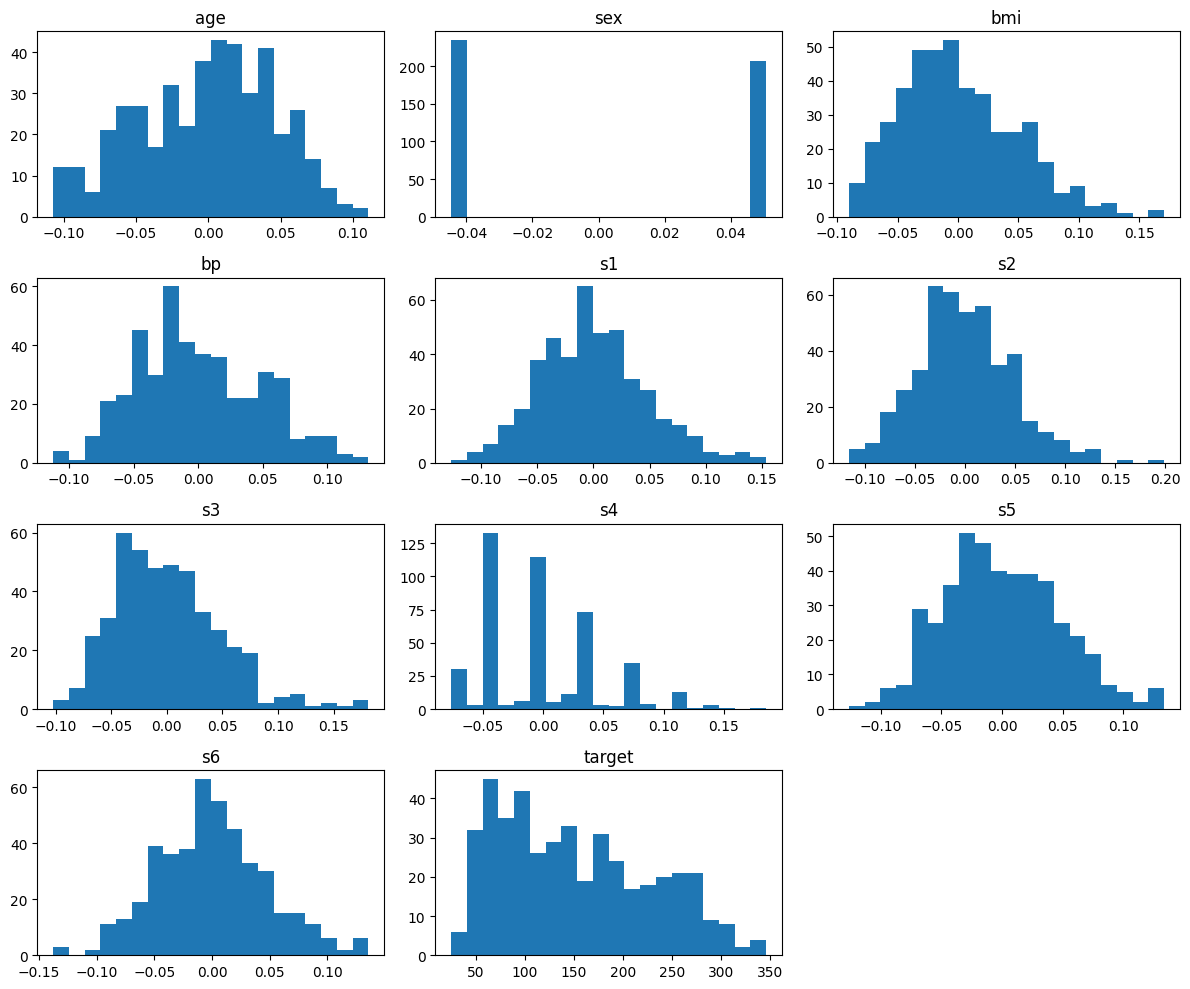

In [810]:
df.hist(bins=20, figsize=(12, 10), grid=False)
plt.tight_layout()
plt.show()

A quick summary of the histogram above, we have a histogram for each feaature with the rangges of values for each feature on the X-axis being plotted against the frequency on the right axis. This gives us an insight on the distribution of each feature

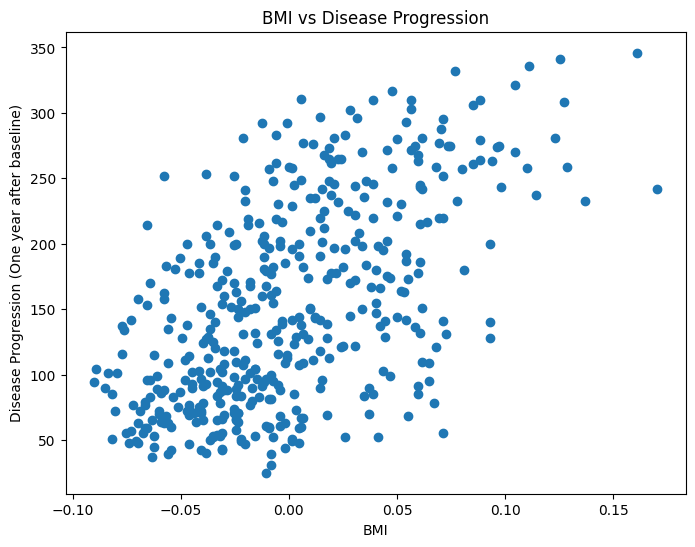

In [811]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['target'])
plt.title("BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression (One year after baseline)")
plt.show()

A scatter plot between the BMI and disease progression will give use an idea of weather there's a visible trend between both variables.

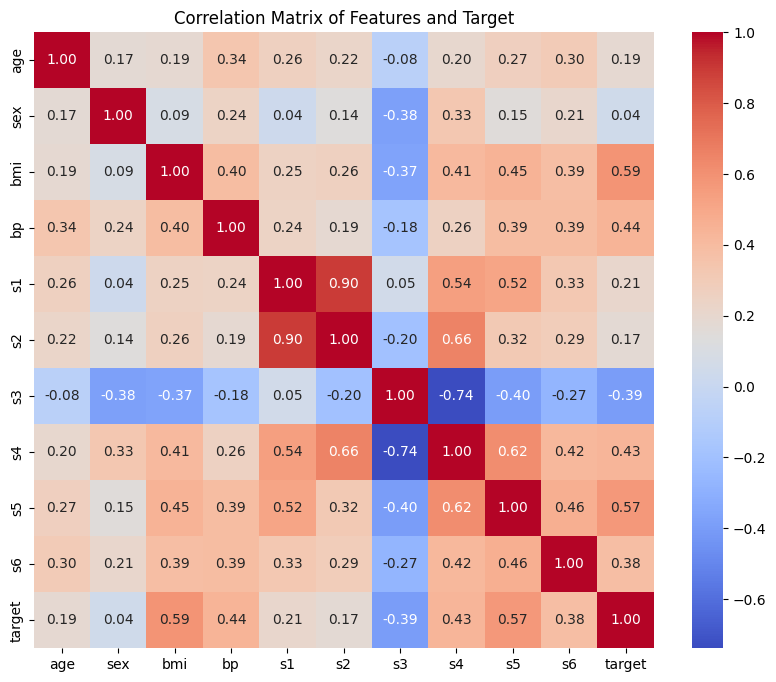

In [812]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features and Target")
plt.show()

The above correlation diagram helps us to show the connection between two numerical variables, for a quick example taking look at the BMI and the target (dieases progression) it has the highes value of 0.59 which shows a strong correlation there.

## Cleaning the data

In [813]:
print(df.isnull().sum())
print(df.duplicated().sum())


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
0


No significant data cleaning is needed for this dataset considering the data is already well prepared and scaled with no missing values, duplicated values or outliers

## Spliting the data set into test,train and Validation

In [814]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (331, 10)
Validation set size: (44, 10)
Test set size: (67, 10)


In [815]:
X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]
X_test_bmi = X_test[['bmi']]
y_train_bmi = y_train
y_val_bmi = y_val
y_test_bmi = y_test

In [816]:
output = {}

## Creating a model for Degree 0 to 5 and also evaluating (MAE, MAPE AND R-Squared)

In [817]:
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train_bmi)
    
    y_val_pred = model.predict(X_val_poly)
    
    r2 = r2_score(y_val_bmi, y_val_pred)
    mae = mean_absolute_error(y_val_bmi, y_val_pred)
    mape = mean_absolute_percentage_error(y_val_bmi, y_val_pred)
    
    output[degree] = {
        'Degree': degree,
        'R-Squared': r2,
        'MAE': mae,
        'MAPE': mape
    }


In [818]:
output_df = pd.DataFrame(output).T

print("Polynomial Regression Results (BMI) for degrees 0 to 5:")
print(output_df)


Polynomial Regression Results (BMI) for degrees 0 to 5:
   Degree  R-Squared        MAE      MAPE
0     0.0  -0.106957  66.057059  0.712639
1     1.0   0.331264  47.208472  0.470600
2     2.0   0.331631  47.213700  0.472397
3     3.0   0.331638  47.185414  0.472227
4     4.0   0.340758  46.090118  0.460503
5     5.0   0.349881  45.462121  0.451753


Cosidering the result shown on the table above for the used degrees (0 to 5) we can say the best model is the one using degree 5 considering the low Mean Absolute error and MAPE and also the R-Squared which is high reiterates the choice

In [819]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train_bmi)
X_test_poly = poly.transform(X_test[['bmi']])

model = LinearRegression()
model.fit(X_train_poly, y_train_bmi)

# Predict on the test set
y_test_pred = model.predict(X_test_poly)

# Evaluate the model on the test set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Display test results
print(f"Test set results for Degree 5 Polynomial Model:")
print(f"R-Squared: {r2_test}")
print(f"MAE: {mae_test}")
print(f"MAPE: {mape_test}")

Test set results for Degree 5 Polynomial Model:
R-Squared: 0.26669658449530775
MAE: 51.750257092773964
MAPE: 0.43026713233054403


In [820]:
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train_bmi)
X_val_poly = poly.transform(X_val_bmi)
X_test_poly = poly.transform(X_test_bmi)

In [821]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [822]:
y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_val_poly)
y_test_pred = model.predict(X_test_poly)


/Users/elder/Desktop/ml_ai_2024/cscn8010/CSCN8010_CLASSICAL_ML/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


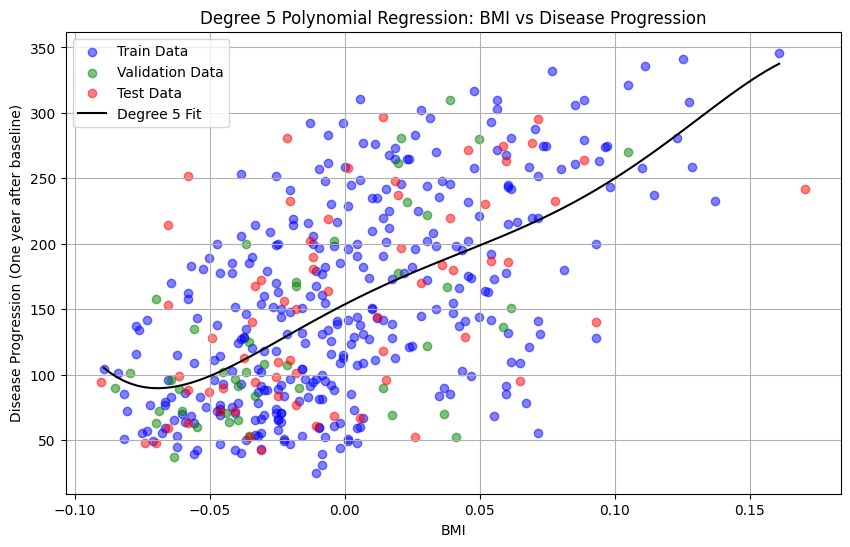

In [823]:
plt.figure(figsize=(10, 6))

plt.scatter(X_train_bmi, y_train, color='blue', label='Train Data', alpha=0.5)
plt.scatter(X_val_bmi, y_val, color='green', label='Validation Data', alpha=0.5)
plt.scatter(X_test_bmi, y_test, color='red', label='Test Data', alpha=0.5)

bmi_range = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)
bmi_range_poly = poly.transform(bmi_range)
y_range_pred = model.predict(bmi_range_poly)
plt.plot(bmi_range, y_range_pred, color='black', label='Degree 5 Fit')

plt.title('Degree 5 Polynomial Regression: BMI vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression (One year after baseline)')
plt.legend()
plt.grid(True)

plt.show()

In [824]:
coefficients = model.coef_
intercept = model.intercept_

equation = f"Disease Progression = {intercept:.2f}"
for i in range(1, len(coefficients)):
    equation += f" + ({coefficients[i]:.2f} * x^{i})"

print("Equation of the Degree 5 Polynomial Model:")
print(equation)


Equation of the Degree 5 Polynomial Model:
Disease Progression = 153.65 + (1059.89 * x^1) + (-3824.15 * x^2) + (-16770.23 * x^3) + (753722.52 * x^4) + (-2993716.57 * x^5)


In [825]:
bmi_value = 0.05

bmi_value_poly = poly.transform([[bmi_value]])
predicted_progression = model.predict(bmi_value_poly)

print(f"Expected diabetes progression for BMI = {bmi_value}: {predicted_progression[0]:.2f}")

Expected diabetes progression for BMI = 0.05: 198.77


/Users/elder/Desktop/ml_ai_2024/cscn8010/CSCN8010_CLASSICAL_ML/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [826]:
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_bmi)
    
    feature_names = poly.get_feature_names_out()
    
    num_parameters = len(feature_names)
    
    print(f"Degree {degree}: {num_parameters} trainable parameters - {feature_names}")


Degree 0: 1 trainable parameters - ['1']
Degree 1: 2 trainable parameters - ['1' 'bmi']
Degree 2: 3 trainable parameters - ['1' 'bmi' 'bmi^2']
Degree 3: 4 trainable parameters - ['1' 'bmi' 'bmi^2' 'bmi^3']
Degree 4: 5 trainable parameters - ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4']
Degree 5: 6 trainable parameters - ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


## Conclusion

In order to predict the progression of diabetes one year after baseline, we used a univariate polynomial regression model in this analysis utilising BMI. Models of different polynomial degrees (0–5) were tested, and their performance was assessed using measures such as R-squared, Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). With the highest R-squared value and the lowest error metrics, the degree 5 polynomial regression model outperformed the others on both the training and validation sets. The model strengths include the good fiting on the training and validation sets and it also performed resonably well on the training set.
Although the model seems to fail in terms of how it relates to outliers, polynomial regression models especially high degree ones are highly sensitive to outliers the model also failed to predict resonable outcomes when the BMI values went outside the normal range.
In summary, the degree 5 polynomial regression model struggled with predictions outside of the data range and displayed symptoms of overfitting, despite its strong performance in capturing the non-linear relationship between BMI and the course of diabetes. 


## Part 3

In [827]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

In [828]:
def fit_and_evaluate_poly(degree, X_train, y_train, X_val, y_val):

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
    
    return {
        'Degree': degree,
        'R-Squared (Train)': r2_train,
        'R-Squared (Validation)': r2_val,
        'MAE (Validation)': mae_val,
        'MAPE (Validation)': mape_val
    }

results = []
for degree in [2, 3]:
    result = fit_and_evaluate_poly(degree, X_train, y_train, X_val, y_val)
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df)


   Degree  R-Squared (Train)  R-Squared (Validation)  MAE (Validation)  \
0       2           0.086353               -0.196728         58.159091   
1       3           0.705443              -46.397804        244.386364   

   MAPE (Validation)  
0           0.623727  
1           2.207823  


The degree 2 model is a preferable option, according to the results, because the degree 3 model shows significant overfitting. Although the degree 2 model does not perform as well as the degree 3 model, it does generalise better and does not fail as badly.

In [829]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_test_pred = model.predict(X_test_poly)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"R-Squared (Test): {r2_test}")
print(f"MAE (Test): {mae_test}")
print(f"MAPE (Test): {mape_test}")

R-Squared (Test): -0.2099958404375597
MAE (Test): 62.776119402985074
MAPE (Test): 0.5356917227553201


Despite being selected above the degree 3 model, which significantly overfitted, these revised findings demonstrate that the degree 2 polynomial model is not generalising effectively to the test data. The model's high error metrics and negative R-squared value indicate that it performs badly on unknown data.


In [830]:
intercept = model.intercept_
coefficients = model.coef_

feature_names = poly.get_feature_names_out(X.columns)

equation = f"Diabetes Progression = {intercept:.2f}"
for i in range(1, len(coefficients)):
    equation += f" + ({coefficients[i]:.2f} * {feature_names[i]})"

print("Equation of the Degree 2 Polynomial Model:")
print(equation)


Equation of the Degree 2 Polynomial Model:
Diabetes Progression = 116706524068150528.00 + (117.47 * age) + (-416.52 * sex) + (409.92 * bmi) + (570.76 * bp) + (11518.69 * s1) + (-11005.10 * s2) + (-3844.75 * s3) + (1501.79 * s4) + (-3483.85 * s5) + (-13.64 * s6) + (-419.02 * age^2) + (5440.21 * age sex) + (-2384.72 * age bmi) + (3473.07 * age bp) + (-26355.82 * age s1) + (28347.12 * age s2) + (18540.52 * age s3) + (8298.88 * age s4) + (4146.62 * age s5) + (-9426.40 * age s6) + (-2.52 * sex^2) + (2025.42 * sex bmi) + (-9040.35 * sex bp) + (17055.84 * sex s1) + (-13835.43 * sex s2) + (-4016.94 * sex s3) + (-6199.92 * sex s4) + (1744.24 * sex s5) + (7553.63 * sex s6) + (838.04 * bmi^2) + (640.92 * bmi bp) + (10761.01 * bmi s1) + (-12796.75 * bmi s2) + (-6880.10 * bmi s3) + (-1372.26 * bmi s4) + (-487.73 * bmi s5) + (13609.59 * bmi s6) + (-5009.48 * bp^2) + (20895.93 * bp s1) + (-11954.87 * bp s2) + (-10694.94 * bp s3) + (3308.30 * bp s4) + (-15582.07 * bp s5) + (-6197.32 * bp s6) + (105849

In [831]:

bmi_value = 0.10

bmi_df = pd.DataFrame(columns=X.columns)
bmi_df['bmi'] = [bmi_value]


for col in X.columns:
    if col != 'bmi':
        bmi_df[col] = X_train[col].mean()


bmi_poly = poly.transform(bmi_df)


predicted_progression = model.predict(bmi_poly)

print(f"Expected diabetes progression for BMI = {bmi_value}: {predicted_progression[0]:.2f}")


Expected diabetes progression for BMI = 0.1: 288.00


In [832]:
degree = 2

poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)

feature_names = poly.get_feature_names_out(X.columns)

num_parameters = len(feature_names)

print(f"Degree {degree} Model:")
print(f"Number of trainable parameters: {num_parameters}")
print("Features:", feature_names)


Degree 2 Model:
Number of trainable parameters: 66
Features: ['1' 'age' 'sex' 'bmi' 'bp' 's1' 's2' 's3' 's4' 's5' 's6' 'age^2'
 'age sex' 'age bmi' 'age bp' 'age s1' 'age s2' 'age s3' 'age s4' 'age s5'
 'age s6' 'sex^2' 'sex bmi' 'sex bp' 'sex s1' 'sex s2' 'sex s3' 'sex s4'
 'sex s5' 'sex s6' 'bmi^2' 'bmi bp' 'bmi s1' 'bmi s2' 'bmi s3' 'bmi s4'
 'bmi s5' 'bmi s6' 'bp^2' 'bp s1' 'bp s2' 'bp s3' 'bp s4' 'bp s5' 'bp s6'
 's1^2' 's1 s2' 's1 s3' 's1 s4' 's1 s5' 's1 s6' 's2^2' 's2 s3' 's2 s4'
 's2 s5' 's2 s6' 's3^2' 's3 s4' 's3 s5' 's3 s6' 's4^2' 's4 s5' 's4 s6'
 's5^2' 's5 s6' 's6^2']


## Decision Tree

In [833]:
def fit_and_evaluate_tree(max_depth, X_train, y_train, X_val, y_val):
    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree.fit(X_train, y_train)

    y_train_pred = tree.predict(X_train)
    y_val_pred = tree.predict(X_val)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
    
    return {
        'Max Depth': max_depth,
        'R-Squared (Train)': r2_train,
        'R-Squared (Validation)': r2_val,
        'MAE (Validation)': mae_val,
        'MAPE (Validation)': mape_val
    }

results = []
for max_depth in [2, 4]:
    result = fit_and_evaluate_tree(max_depth, X_train, y_train, X_val, y_val)
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df)


   Max Depth  R-Squared (Train)  R-Squared (Validation)  MAE (Validation)  \
0          2           0.438054                0.308988         45.801381   
1          4           0.582718                0.135616         49.959975   

   MAPE (Validation)  
0           0.476091  
1           0.488994  


In [834]:
best_max_depth = 2

best_tree = DecisionTreeRegressor(max_depth=best_max_depth, random_state=42)
best_tree.fit(X_train, y_train)

y_test_pred = best_tree.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Test Set Results for Decision Tree (max_depth={best_max_depth}):")
print(f"R-Squared (Test): {r2_test}")
print(f"MAE (Test): {mae_test}")
print(f"MAPE (Test): {mape_test}")


Test Set Results for Decision Tree (max_depth=2):
R-Squared (Test): 0.3622177309389697
MAE (Test): 48.34020278685211
MAPE (Test): 0.41856889606151276


In [835]:
bmi_value = 0.025

sample_df = pd.DataFrame(columns=X.columns)
sample_df['bmi'] = [bmi_value]

for col in X.columns:
    if col != 'bmi':
        sample_df[col] = X_train[col].mean()

predicted_progression = best_tree.predict(sample_df)

print(f"Expected diabetes progression for BMI = {bmi_value}: {predicted_progression[0]:.2f}")


Expected diabetes progression for BMI = 0.025: 190.02


## Conclusion
With an MAE of 48.34 and an R-squared of 0.36, the decision tree model with max depth 2 offers respectable generalisation; however, due to its restricted complexity, it is unable to capture more complicated relationships in the data.


In [836]:
def fit_and_evaluate_knn(n_neighbors, X_train, y_train, X_val, y_val):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
  
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)
    
    return {
        'k': n_neighbors,
        'R-Squared (Train)': r2_train,
        'R-Squared (Validation)': r2_val,
        'MAE (Validation)': mae_val,
        'MAPE (Validation)': mape_val
    }

results = []
for k in [3, 5]:
    result = fit_and_evaluate_knn(k, X_train, y_train, X_val, y_val)
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df)


   k  R-Squared (Train)  R-Squared (Validation)  MAE (Validation)  \
0  3           0.629300                0.214184         45.795455   
1  5           0.570761                0.358481         43.290909   

   MAPE (Validation)  
0           0.442421  
1           0.412441  


In [837]:
best_k = 5

best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_test_pred = best_knn.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print(f"Test Set Results for kNN (k={best_k}):")
print(f"R-Squared (Test): {r2_test}")
print(f"MAE (Test): {mae_test}")
print(f"MAPE (Test): {mape_test}")


Test Set Results for kNN (k=5):
R-Squared (Test): 0.47651971856469033
MAE (Test): 41.71940298507462
MAPE (Test): 0.34455670441259584


Performing well on the test set, the k = 5 kNN model demonstrates a good balance between fitting the training data and generalising to new, unknown data. The low MAE and MAPE values demonstrate that the model produces relatively accurate predictions, and the R-squared value of 0.477 suggests that the model captures a significant amount of the variance in diabetes development.Based on the results of the test set and validation, the kNN model with k = 5 is the optimal option.

In [838]:
bmi_value = 0.03

sample_df = pd.DataFrame(columns=X.columns)
sample_df['bmi'] = [bmi_value]

for col in X.columns:
    if col != 'bmi':
        sample_df[col] = X_train[col].mean()

predicted_progression = best_knn.predict(sample_df)

print(f"Expected diabetes progression for BMI = {bmi_value}: {predicted_progression[0]:.2f}")


Expected diabetes progression for BMI = 0.03: 180.40


## Conclusion

With an MAE of 41.72 and an R-squared of 0.48, the k = 5 kNN model provides an acceptable trade-off between fitting the training data and generalising to new data. But only 48% of the variation can be explained by the model, indicating that it may not be accounting for all significant aspects. 
